# Introduction

### Google Data Analytics Project Capstone - Case Study 1.

The steps to solve the problem will be followed as mentioned in the course.

* Ask
* Prepare
* Process
* Analyze
* Share
* Act

<hr style="border:1px solid white">

## ASK

**Problem Statement:-**<br>
Cyclistic is a successful bike-sharing program. The program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across **Chicago**.

The bikes can be unlocked from one station and returned to any other station in the system anytime.

I am a Junior Data Analyst who is assigned the task of ensuring the company's success by maximizing the annual membership.

Thus I have to understand how the casual and the annual member riders use the bikes. These insights will be used to build a new marketing strategy to improve profits.

Their pricing plans include:-
* Single Ride Pass
* Full Day Pass
* Annual Memberships

Customers who purchase single-ride or full-day passes are referred to as casual riders.<br>
Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

And they have a clear goal - Design marketing strategies aimed at converting casual riders into annual members.

And for that they need to better the difference between the casual and member riders.


Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?



### Guiding questions
**What is the problem you are trying to solve?**<br>
The main objective is to determine a way to understand the riding patterns for annual and casual members and build a profile for them so that we can make the best marketing strategies to convert casual bike riders into annual members.

**How can your insights drive business decisions?**<br>
The insights will help the finance and marketing team to increase annual members.

### Key tasks
1. Identify the business task
    
2. Consider key stakeholders

### Deliverable
**A clear statement of the business task:-**<br>
Find the major differences between the annual and casual members and how marketing strategies could influence the casual members.

<hr style="border:1px solid white">

## PREPARE

Will be using the data provided in the Course. The [link](https://divvy-tripdata.s3.amazonaws.com/index.html) for the data.

The link includes data from April 2020 till previous month corresponding to your current month.

There are multiple csv files each for a specific month starting from April 2020.

### Guiding questions
**Where is your data located?**<br>
The data is located in the Amazon servers of the company.

**How is the data organized?**<br>
There are multiple csv files each for a specific month starting from April 2020.

**Are there issues with bias or credibility in this data? Does your data ROCCC?**<br>
There is no bias or cedibility issues with the data since the data of the clients of the company and is given by the company itself.<br>
The data is ROCCC as it is **Reliable**, **Original**, **Comprehensive**, **Current** and **Cited**.

**How are you addressing licensing, privacy, security, and accessibility?**<br>
The data belongs to the company so they have their own license. The data doesn't contain any personal information about the clients and thus there is no issue of privacy. The data is secure and accessible.

**How did you verify the data’s integrity?**<br>
All the csv files have consistent format of data i.e. the same columns and the columns have the same data type.

**How does it help you answer your question?**<br>
It has information regarding the all the rides of the annual and casual members and thus it might have important insights about their riding patterns.

<hr style="border:1px solid white">

### PROCESS
In this step we will prepare the data for analysis.<br>
All the csv files will be merged into one file to improve workflow.<br>
* Data types of certain columns will be changed.
* Some data will be extracted from some columns to form new columns.

The transformed csv file will be saved.

 Importing the Libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as mp
import numpy as np
import seaborn as sns
import plotly.express as px
import os

%matplotlib inline

Reading all the files and merging them in 1 dataframe and storing the combined data in a csv file.

Function to transform the entire data

In [10]:
def readFiles(inputDir, outputDir, outFileName, num_files = 1000):
#     inputDir = r'Data\Extracted'
    data = pd.DataFrame()

    i = 0
    for filename in os.listdir(inputDir):
        f = os.path.join(inputDir, filename)

        print(r'Reading {} data'.format(f))
        data = pd.concat([data, pd.read_csv(f)], axis=0, ignore_index=True)
        i += 1

        if i == num_files:
            break
    
    print("\nData Reading Complete.\n")
    return transform_data(data, outputDir, outFileName)



def transform_data(df, outputDir, outFileName):
    print("Data Processing Started.")
    # Removal of duplicate rows
    prev_rows = df.shape[0]
    df.drop_duplicates(subset=['ride_id'], inplace=True)
    print(prev_rows - df.shape[0], ' rows removed!')
    
    # Change datetime formats started_at, ended_at
    df['started_at'] = pd.to_datetime(df['started_at'], format= '%Y-%m-%d %H:%M:%S')
    df['ended_at'] = pd.to_datetime(df['ended_at'], format= '%Y-%m-%d %H:%M:%S')
    print('Formats of the dates have been modified.')
    
    # Convert that time in minutes
    df['ride_time'] = round(((df['ended_at'] - df['started_at']).dt.total_seconds()) / 60)
    print('Ride time has been calculated.')

    # Get year and month into one column
    # df['year_month'] = df['started_at'].dt.year.astype(str) + ' - ' + df['started_at'].dt.month.astype(str)
    df['yearMonth'] = df['started_at_datetime'].map(lambda x: '{year}-{month:02}'.format(year=x.year,month=x.month))
    print('Calculated the starting Year Month.')
    
    # Get the day of the week (Mon - 0, Tue - 1, ..., Sun - 6)
    df['weekday'] = df['started_at'].dt.weekday
    print('Calculated starting weekday.')
    
    # Get the start hour of the ride
    df['start_hour'] = df['started_at'].dt.hour
    print('Calculated start hour.')
    
    # Save the dataframe
    df.to_csv(os.path.join(outputDir, outFileName), index = False, encoding='utf-8')
    print('\nTransformed Data Saved Successfully.')
    
    return df


def load_data(inputDir, outputDir, outFileName, loadNew=False):
    oldFile = os.path.join(outputDir, outFileName)
    if os.path.exists(oldFile) and loadNew == False:
        print("Old File Exists. Loading and returning that.")
        return pd.read_csv(oldFile)
    else:
        print("Reading and processing new data.")
        return readFiles(inputDir, outputDir, outFileName)

In [1]:
inputDir = r"Data\Extracted"
outFileName = "Transformed.csv"
outputDir = r"Data\Transformed"
data = load_data(inputDir, outputDir, outFileName, loadNew=False)

Old File Exists. Loading and returning that.


In [4]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [5]:
data.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
ride_time             float64
year_month             object
weekday                 int64
start_hour              int64
dtype: object

In [14]:
data.shape

(10219178, 17)

### Guiding questions
**What tools are you choosing and why?**<br>
I will be using Python for this project.
* Pandas has a wide range of functions to process and manipulate data.
* To learn more about the library.

**Have you ensured your data’s integrity?**<br>
The data is consistent through out the csv files.

**What steps have you taken to ensure that your data is clean?**<br>
Duplicate values were removed from the data. Some of the columns were formatted, their data type was changed, new information was extracted from some of the existing columns. Some of the rows with error data were removed.

**How can you verify that your data is clean and ready to analyze?**<br>
Summary statistics of the processed data shows values which seem plausible in real life.

**Have you documented your cleaning process so you can review and share those results?**<br>
Yes, the entire process has been coded and documented in this Jupyter Notebook.

<hr style="border:1px solid white">

## ANALYZE

The analysis phase will include finding key differences between the Annual and Casual members.

In this phase Annual members will be referred as Members and Casual members will be Casuals.<br>
This is because the same terms are used in the dataset.

Lets see the summary of the data.

In [15]:
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,start_lat,start_lng,end_lat,end_lng,ride_time,weekday,start_hour
count,10219178.00000,10219178.00000,10208686.00000,10208686.00000,10219178.00000,10219178.00000,10219178.00000
mean,41.90174,-87.64595,41.90201,-87.64618,23.05970,3.17174,14.25898
std,0.04580,0.02867,0.04589,0.02849,233.62737,1.99989,4.89717
min,41.64000,-87.87000,41.39000,-88.97000,-29050.00000,0.00000,0.00000
25%,41.88169,-87.66000,41.88189,-87.66014,7.00000,1.00000,11.00000
50%,41.89900,-87.64182,41.89993,-87.64288,12.00000,3.00000,15.00000
75%,41.92953,-87.62775,41.92955,-87.62775,23.00000,5.00000,18.00000
max,45.63503,-73.79648,42.16812,-87.44000,58720.00000,6.00000,23.00000


It can be observed that **ride_time** has some weird values.

The column has negative values which should be impossible and has a maximum value of **58720 minutes** which is around **40 days**.<br>
That means there are definitely error values in the column and we will deal with them later.

Other then that all columns seem normal.

#### Data Distribution Analysis

Here we will try to analyze the rides based on all the features in the data.

#### Distribution by Client Types.

Number of members and casuals.

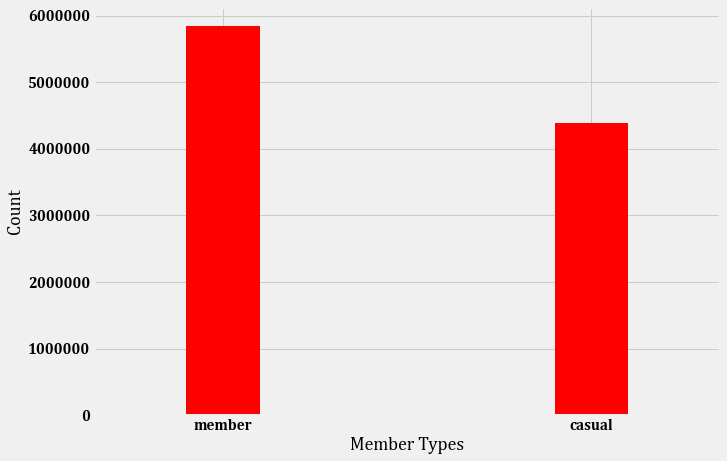

In [9]:
mp.figure(figsize=(10,7))
mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'weight' : 'bold',
        'size'   : 15}

_ = mp.rc('font', **font)
_ = mp.ticklabel_format(style='plain')

count_plot = data["member_casual"].value_counts().plot.bar(rot=0, width=0.2, color='red')
_ = count_plot.tick_params(color="black")
_ = count_plot.set(xlabel="Member Types", ylabel="Count")

The number of members is more than casuals. Members are **57.1 %** and Casuals are **42.9 %**

Members exceed Casuals by **14.21 %**

#### Distribution Analysis based on the **year_month**.

Calculating the total rides per month, the count of member and casual rides and their respective percentages.

In [31]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [41]:
group_data = data.groupby(['yearMonth'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data['mem_cas_p_diff'] = group_data['members_p'] - group_data['casual_p']
group_data['mem_cas_c_diff'] = group_data['members_c'] - group_data['casual_c']

In [42]:
group_data.dtypes

yearMonth           object
ride_count           int64
ride_percentage    float64
members_c            int64
casual_c             int64
members_p          float64
casual_p           float64
mem_cas_p_diff     float64
mem_cas_c_diff       int64
dtype: object

In [58]:
group_data

,yearMonth,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,2020-04,84776,0.829577,61148,23628,72.128904,27.871096,44.257809,37520
1,2020-05,200274,1.959786,113365,86909,56.604951,43.395049,13.209902,26456
2,2020-06,343005,3.356483,188287,154718,54.893369,45.106631,9.786738,33569
3,2020-07,551480,5.396520,282184,269296,51.168492,48.831508,2.336984,12888
4,2020-08,622361,6.090128,332700,289661,53.457720,46.542280,6.915440,43039
5,2020-09,532958,5.215273,302266,230692,56.714788,43.285212,13.429576,71574
6,2020-10,388653,3.803173,243641,145012,62.688568,37.311432,25.377136,98629
7,2020-11,259716,2.541457,171617,88099,66.078717,33.921283,32.157434,83518
8,2020-12,131364,1.285465,101309,30055,77.120825,22.879175,54.241649,71254
9,2021-01,96834,0.947571,78717,18117,81.290662,18.709338,62.581325,60600


<Figure size 1080x1080 with 0 Axes>

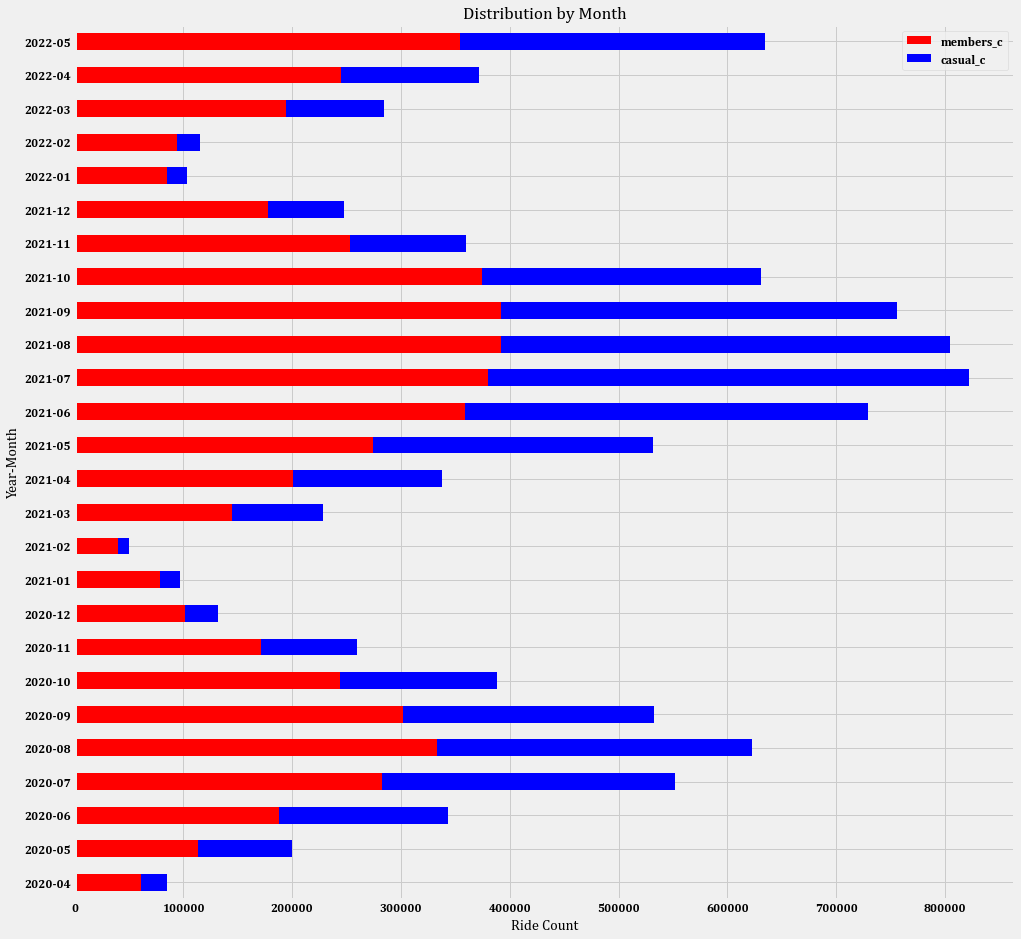

In [46]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'weight' : 'bold',
        'size'   : 12}

mp.rc('font', **font)

ax = group_data[['yearMonth', 'members_c', 'casual_c']].sort_values(by=["yearMonth"], ascending=True).plot(kind='barh', stacked=True, color=['red', 'blue'], figsize=(15,15))
ax.set_yticklabels(group_data['yearMonth'])
_ = mp.xlabel('Ride Count')
_ = mp.ylabel('Year-Month')
_ = mp.title('Distribution by Month')

There are more rides in the winter season of 2020 and 2021.

Month with highest bumber of rides is August 2021.

In all months we have more members than casuals (Maybe because of work commutes).

Seems like there is a yearly pattern to the number of rides. Lets compare it with the climate data of chicago.

#### Chicago Temperature Analysis

We will try to see if the temperature has any kind of effect on the rides.

In [19]:
chicago_mean_temp = [-3.2, -1.2, 4.4, 10.5, 16.6, 22.2, 24.8, 23.9, 19.9, 12.9, 5.8, -0.3]
month = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

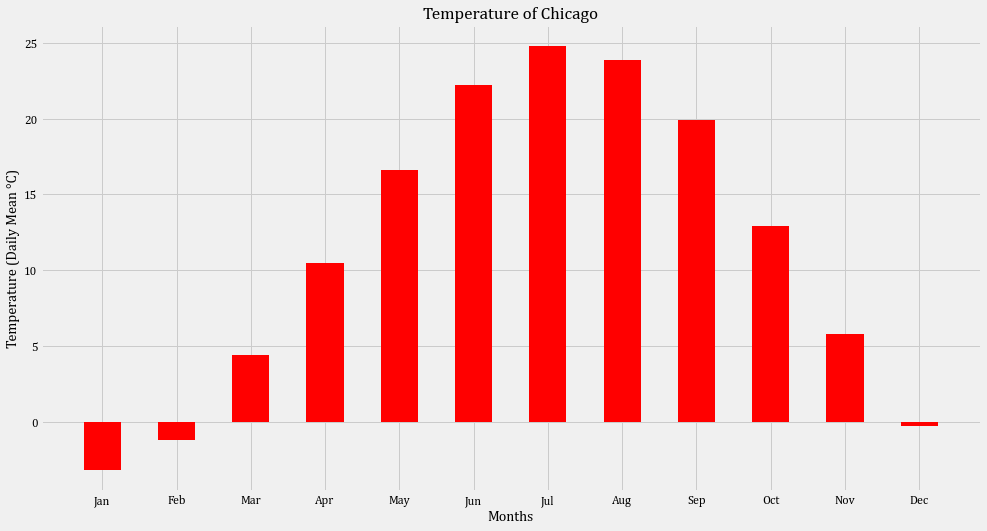

In [25]:
_ = mp.figure(figsize=(15,8))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)

mp.bar(month, chicago_mean_temp, color='red', width = 0.5)

# ax.set_yticklabels(month)
# _ = mp.xticks(np.arange(0, 300000, 25000))
_ = mp.xlabel('Months')
_ = mp.ylabel('Temperature (Daily Mean °C)')
_ = mp.title('Temperature of Chicago')
# _ = mp.legend(["member", "casual"])

Temperature seems to affect the rides.

Riders prefer moderate temperatures (20 °C - 25 °C) which is seen in the later half of the years where the number of rides increase significantly.

#### Distribution Analysis based on the **weekday**.

Calculating the total rides per day of the week, the count of member and casual rides and their respective percentages.

In [40]:
group_data_by_week_day = data.groupby(['weekday'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_week_day['mem_cas_p_diff'] = group_data_by_week_day['members_p'] - group_data_by_week_day['casual_p']
group_data_by_week_day['mem_cas_c_diff'] = group_data_by_week_day['members_c'] - group_data_by_week_day['casual_c']

In [41]:
group_data_by_week_day

,weekday,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,0,1307511,12.794679,803523,503988,61.454397,38.545603,22.908794,299535
1,1,1347149,13.182557,875522,471627,64.990732,35.009268,29.981465,403895
2,2,1363149,13.339126,883533,479616,64.815585,35.184415,29.631170,403917
3,3,1377395,13.478530,866913,510482,62.938591,37.061409,25.877181,356431
4,4,1461558,14.302109,839057,622501,57.408396,42.591604,14.816791,216556
5,5,1813777,17.748756,838676,975101,46.239201,53.760799,-7.521597,-136425
6,6,1548639,15.154242,728229,820410,47.023806,52.976194,-5.952388,-92181


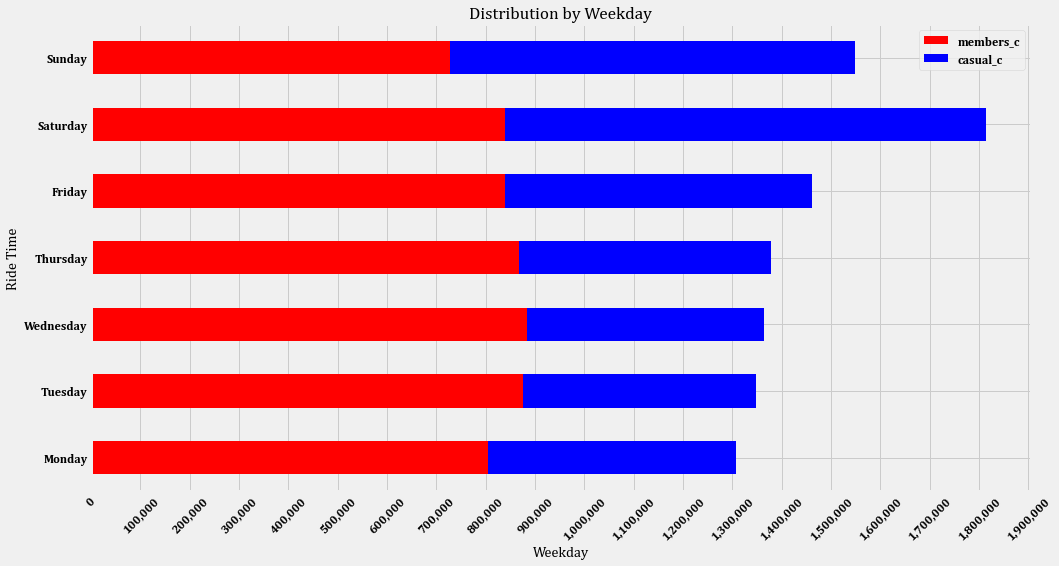

In [55]:
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)



weekday_data = pd.DataFrame(group_data_by_week_day, columns=['members_c','casual_c'], index = group_data_by_week_day['weekday'])

ax = weekday_data.plot.barh(stacked=True, figsize=(15, 8), color=['red', 'blue'])

_ = mp.yticks(ticks = np.arange(0, 7), labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = mp.xticks(np.arange(0, 2000000, 100000), rotation = 45)
# _ = mp.ticklabel_format(style='plain', axis='y')
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = mp.title('Distribution by Weekday')
_ = mp.ylabel('Ride Time')
_ = mp.xlabel('Weekday')
# plt.show()

0 - Monday   ||    1 - Tuesday   ||    2 - Wednesday   ||    3 - Thursday   ||    4 - Friday   ||    5 - Saturday   ||    6 - Sunday

Most Rides are on the weekend. Casuals have the most rides during weekend.

Saturday has most rides.

During weekdays, members have most rides.

Weekends have the most rides of casual, highest being friday.

#### Distribution Analysis based on the **start_hour**.

Calculating the total rides based on start hour, the count of member and casual rides and their respective percentages.

In [56]:
group_data_by_start_hour = data.groupby(['start_hour'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_start_hour['mem_cas_p_diff'] = group_data_by_start_hour['members_p'] - group_data_by_start_hour['casual_p']
group_data_by_start_hour['mem_cas_c_diff'] = group_data_by_start_hour['members_c'] - group_data_by_start_hour['casual_c']

In [57]:
group_data_by_start_hour

,start_hour,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,0,136692,1.337603,52461,84231,38.378983,61.621017,-23.242033,-31770
1,1,91428,0.894671,33203,58225,36.316008,63.683992,-27.367984,-25022
2,2,55588,0.543958,18793,36795,33.807656,66.192344,-32.384687,-18002
3,3,31559,0.308821,11246,20313,35.634843,64.365157,-28.730315,-9067
4,4,28423,0.278134,13719,14704,48.267248,51.732752,-3.465503,-985
5,5,74824,0.732192,54724,20100,73.136961,26.863039,46.273923,34624
6,6,199946,1.956576,156664,43282,78.353155,21.646845,56.706311,113382
7,7,363288,3.554963,283951,79337,78.161404,21.838596,56.322807,204614
8,8,432414,4.231397,324176,108238,74.968896,25.031104,49.937791,215938
9,9,380064,3.719125,249902,130162,65.752610,34.247390,31.505220,119740


<Figure size 1080x1080 with 0 Axes>

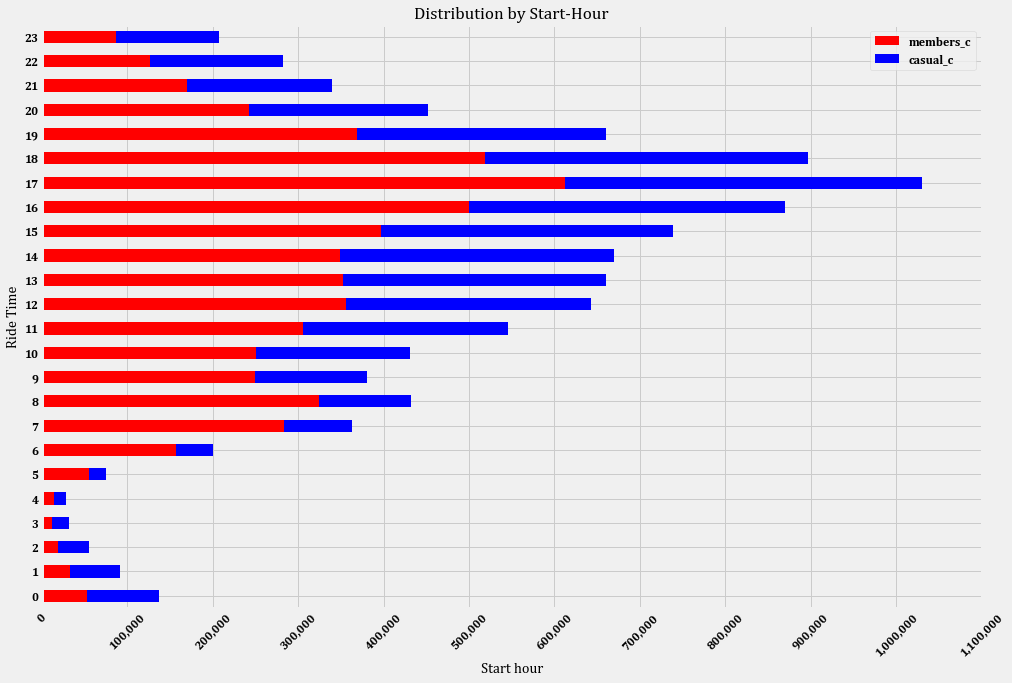

In [60]:
_ = mp.figure(figsize=(15,15))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria',
        'size'   : 12}

mp.rc('font', **font)

start_hour_data = pd.DataFrame(group_data_by_start_hour, columns=['members_c','casual_c'], index = group_data_by_start_hour['start_hour'])

ax = start_hour_data.plot.barh(stacked=True, figsize=(15, 10), color=['red', 'blue'])

_ = mp.yticks(group_data_by_start_hour['start_hour'])
_ = mp.xticks(np.arange(0, 1200000, 100000), rotation = 45)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = mp.title('Distribution by Start-Hour')
_ = mp.ylabel('Ride Time')
_ = mp.xlabel('Start hour')
# plt.show()

Sharp increase in the number of rides in the afternoon till early night.

The number of members is more as compared to the casuals in early morning.

For the rest of the day the number of casuals and members seem almost the same.

#### Distribution Analysis based on the start_hours of each weekday.

Calculating the total rides for the start hours of weekdays, the count of member and casual rides.

<Figure size 3600x3600 with 0 Axes>

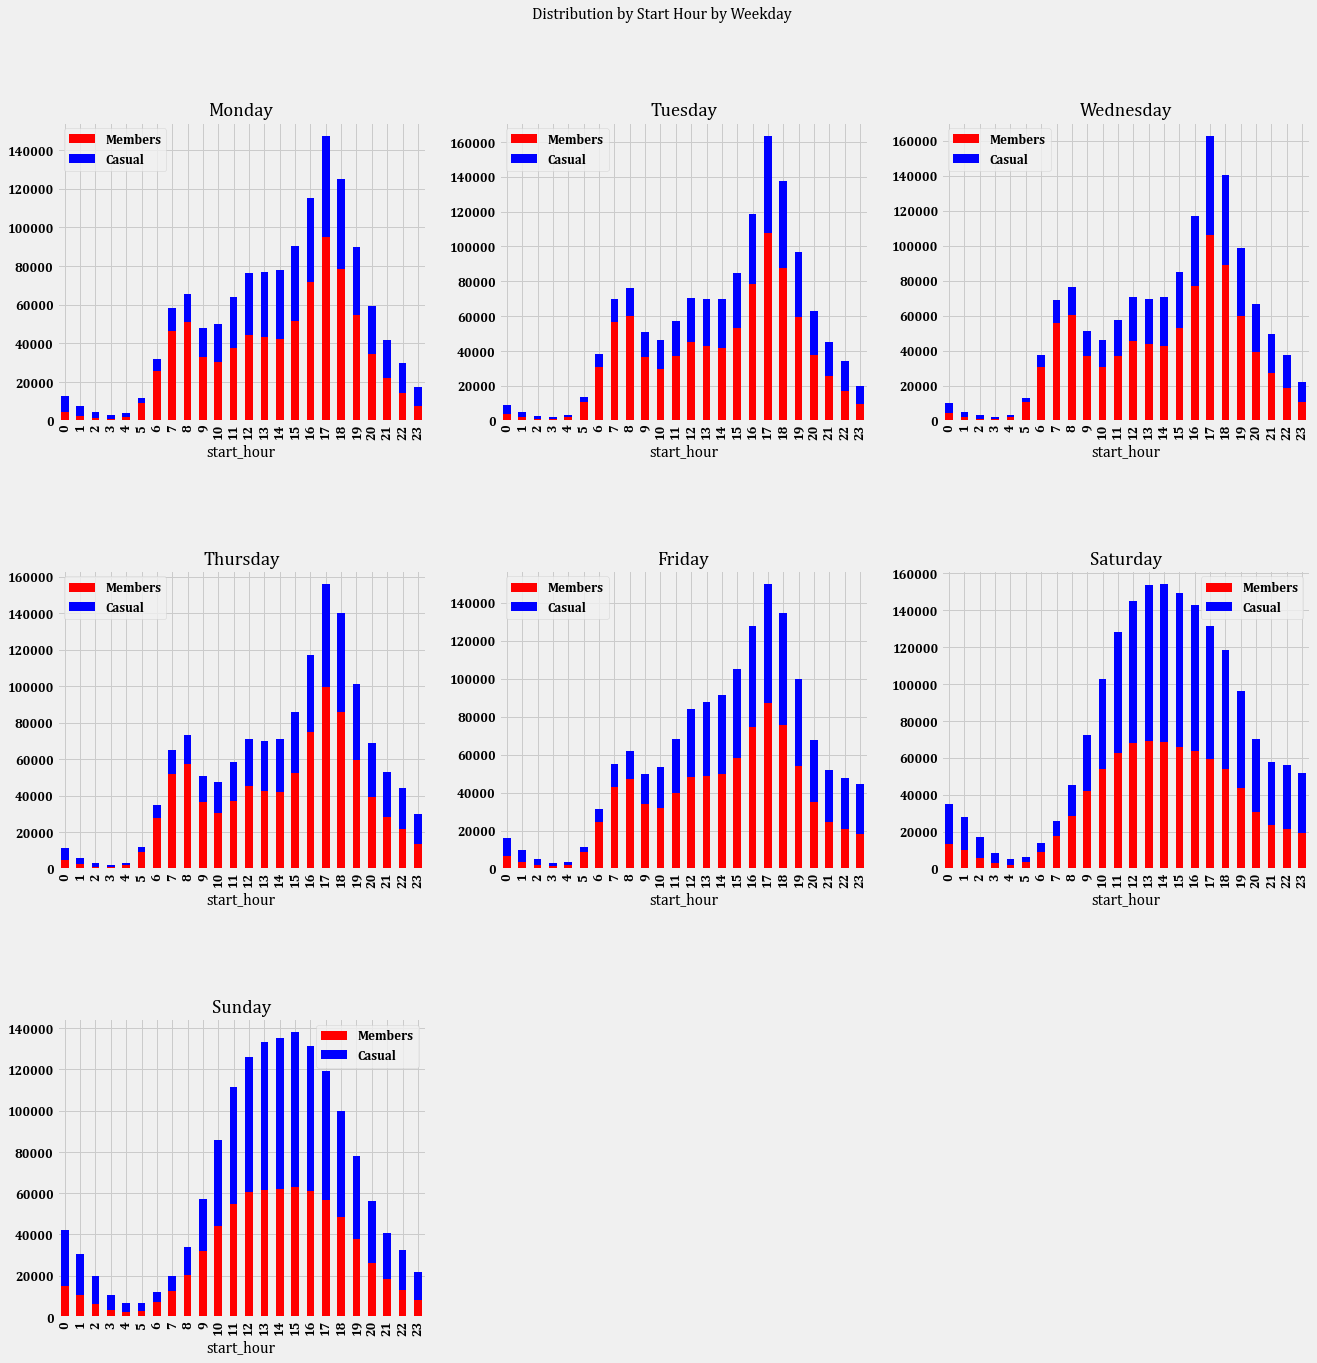

In [61]:
_ = mp.figure(figsize=(50,50))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

weekdays = {0 : 'Monday' , 1 : 'Tuesday' , 2 : 'Wednesday' , 3 : 'Thursday' , 4 : 'Friday' , 5 : 'Saturday' , 6 : 'Sunday'}
day = 0

fig, axs = mp.subplots(3, 3)
mp.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

for i in range(3):
    for j in range(3):
        if day > 6:
            fig.delaxes(axs[i][j])
        else:
            curr_data = data[data['weekday'] == day]

            week_data_by_start_hour = curr_data.groupby(['start_hour'], as_index=False).agg(
                members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
                casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))

            _ = week_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(20,20), ax=axs[i,j], label=['Members', 'Casual'])
            _ = axs[i, j].set_title(f'{weekdays[day]}')
            _ = axs[i, j].legend()

            day += 1
        
_ = mp.suptitle("Distribution by Start Hour by Weekday")


There seems to be a difference between the rides distribution on the weekdays **(Monday to Friday)** and weekends **(Saturday and Sunday)**.

#### Distribution Analysis based on the Type of the Weekday

Dividing the data based on the **Weekday** and **Weekend**.

Calculating the total rides for the start hours of weekday types, the count of member and casual rides.

In [62]:
data['type_of_weekday'] = np.where(data['weekday'] < 5, 'Midweek', 'Weekend')
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour,type_of_weekday
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17,Weekend
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17,Midweek
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17,Midweek
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12,Midweek
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10,Weekend


In [64]:
midweek_data = data[data['type_of_weekday'] == 'Midweek']
weekend_data = data[data['type_of_weekday'] == 'Weekend']

midweek_data_by_start_hour = midweek_data.groupby(['start_hour'], as_index=False).agg(
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))

weekend_data_by_start_hour = weekend_data.groupby(['start_hour'], as_index=False).agg(
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())))


In [65]:
midweek_data_by_start_hour

,start_hour,members_c,casual_c
0,0,24102,35239
1,1,12337,20623
2,2,6670,12262
3,3,4743,7604
4,4,9225,7513
5,5,48147,13809
6,6,139994,33812
7,7,254100,63317
8,8,275625,77966
9,9,176284,74362


In [66]:
weekend_data_by_start_hour

,start_hour,members_c,casual_c
0,0,28359,48992
1,1,20866,37602
2,2,12123,24533
3,3,6503,12709
4,4,4494,7191
5,5,6577,6291
6,6,16670,9470
7,7,29851,16020
8,8,48551,30272
9,9,73618,55800


<Figure size 1080x576 with 0 Axes>

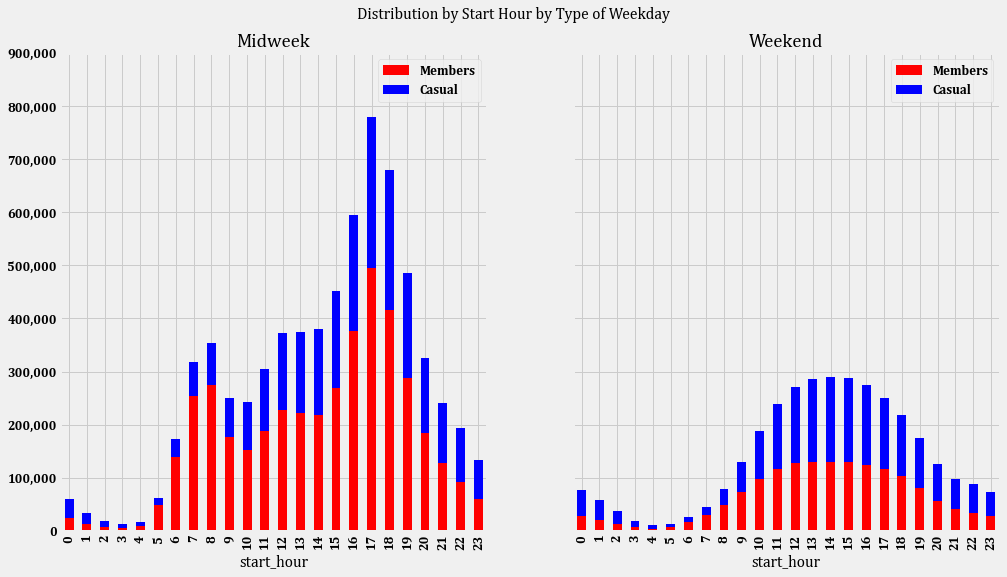

In [70]:
_ = mp.figure(figsize=(15,8))
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

fig, (ax1, ax2) = mp.subplots(1, 2, sharey=True)
mp.subplots_adjust(top=0.9, wspace=0.2, hspace=0.5)

_ = midweek_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(15,8), ax=ax1, label=['Members', 'Casual'])
_ = ax1.set_title('Midweek')
_ = ax1.legend()


_ = weekend_data_by_start_hour.plot(x = 'start_hour', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(15,8), ax=ax2, label=['Members', 'Casual'])
_ = ax2.set_title('Weekend')
_ = ax2.legend()
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = mp.yticks(np.arange(0, 1000000, 100000))
_ = mp.suptitle("Distribution by Start Hour by Type of Weekday")


The number of rides during weekdays is very high as compared to the weekends but this is just because the number of days included in the weekdays is 5 and for weekends is just 2.

During the weekdays the member rides are very high as compared to the casuals.

The member rides increase after 5 am and remain steady till around 3 pm and then again increase after 4 pm till 7 pm. (Maybe they are using it for their commute to work)


During the weekends the casual rides are almost as same as member rides. (Maybe they are using it as a recreational activity)

#### Distribution Analysis based on the rideable types.

Calculating the total rides for the rideable types, the count of member and casual rides and their respective percentages.

In [50]:
group_data_by_rideable_type = data.groupby(['rideable_type'], as_index=False).agg(
    ride_count = pd.NamedAgg(column='ride_id', aggfunc='count'),
    ride_percentage = pd.NamedAgg('ride_id', lambda x:(x.count()/data['ride_id'].count())*100),
    members_c = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum())),
    casual_c = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum())),
    members_p = pd.NamedAgg('member_casual', lambda x: ((x == 'member').sum()/x.count())*100),
    casual_p = pd.NamedAgg('member_casual', lambda x: ((x == 'casual').sum()/x.count())*100))

group_data_by_rideable_type['mem_cas_p_diff'] = group_data_by_rideable_type['members_p'] - group_data_by_rideable_type['casual_p']
group_data_by_rideable_type['mem_cas_c_diff'] = group_data_by_rideable_type['members_c'] - group_data_by_rideable_type['casual_c']

group_data_by_rideable_type

,rideable_type,ride_count,ride_percentage,members_c,casual_c,members_p,casual_p,mem_cas_p_diff,mem_cas_c_diff
0,classic_bike,4061322,39.742159,2559260,1502062,63.015442,36.984558,26.030884,1057198
1,docked_bike,2900774,28.385590,1441702,1459072,49.700597,50.299403,-0.598806,-17370
2,electric_bike,3257082,31.872250,1834491,1422591,56.323144,43.676856,12.646289,411900


In [51]:
data['rideable_type'].value_counts()

classic_bike     4061322
electric_bike    3257082
docked_bike      2900774
Name: rideable_type, dtype: int64

<Figure size 1080x1080 with 0 Axes>

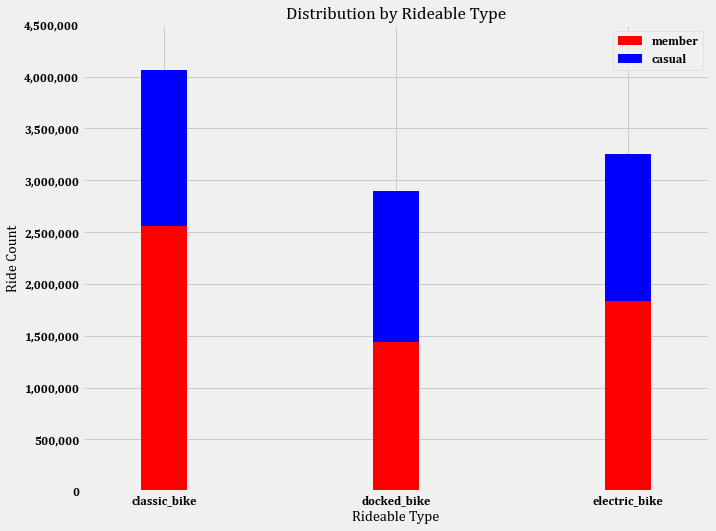

In [54]:
_ = mp.figure(figsize=(15,15))

ax = group_data_by_rideable_type[['rideable_type', 'members_c', 'casual_c']].plot(x='rideable_type', y = ['members_c', 'casual_c'], kind='bar', stacked=True, color=['red', 'blue'], figsize=(10,8), label=['Members', 'Casual'], width=0.2)
ax.set_xticklabels(group_data_by_rideable_type['rideable_type'], rotation=0)
_ = mp.yticks(np.arange(0, 5000000, 500000))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = mp.ylabel('Ride Count')
_ = mp.xlabel('Rideable Type')
_ = mp.title('Distribution by Rideable Type')
_ = mp.legend(["member", "casual"])

Either most of the member riders prefer the classic bike or most of the bikes owned by the company are classic bikes.

Electric ranks 2nd and Docked on 3rd.

#### Handling the outliers in the ride_time column.

As seen above there are -ve values in the columns.<br>
This must be because of an error in entering the values.

Now we will remove some of these values.

In [22]:
np.percentile(data['ride_time'], 99)

140.0

In [20]:
np.percentile(data['ride_time'], 5)

3.0

**5th %tile** of the data is **3 mins** and **99th %tile** is **140 mins**.<br>
A difference of **137 mins**.

We will only be taking **94%** of the data for analysis. i.e. the data between **5 %tile** and **99 %tile**.

In [23]:
fifth_percentile = np.percentile(data['ride_time'], 5)
nintyninth_percentile = np.percentile(data['ride_time'], 99)

reduced_data = data[(fifth_percentile <= data['ride_time']) & (data['ride_time'] <= nintyninth_percentile)]
print(f"{data.shape[0] - reduced_data.shape[0]} rows removed")
reduced_data.head()

924804 rows removed


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,year_month,weekday,start_hour
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,27.0,2020 - 4,6,17
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,8.0,2020 - 4,4,17
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,14.0,2020 - 4,2,17
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,12.0,2020 - 4,1,12
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,53.0,2020 - 4,5,10


In [24]:
reduced_data.shape

(9294374, 17)

#### Distribution Analysis based on the Ride Time.

Calculating the stats for ride times for the member and casual rides.

In [6]:
reduced_data.groupby('member_casual')['ride_time'].agg(mean=np.mean,
                                                       first_quarter=lambda x:x.quantile(0.25),
                                                       median=np.median,
                                                       third_quarter=lambda x:x.quantile(0.75),
                                                       IQR=lambda x:x.quantile(0.75) - x.quantile(0.25))

,mean,first_quarter,median,third_quarter,IQR
member_casual,,,,,
casual,29.117079,14.0,23.0,39.0,25.0
member,17.865891,9.0,15.0,24.0,15.0


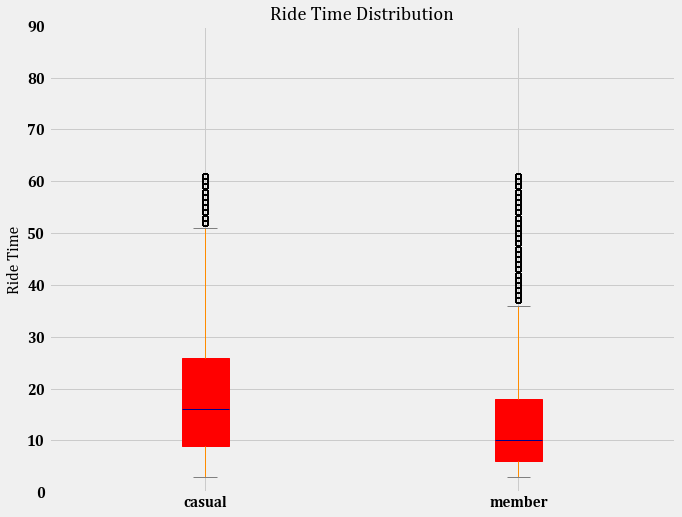

In [27]:
_ = mp.style.use("fivethirtyeight")

font = {'family' : 'cambria', 'size'   : 13}
mp.rc('font', **font)

props = dict(boxes="Red", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")

box = reduced_data.plot(kind='box', by='member_casual', column='ride_time', color = props, fontsize = 15, figsize=(10,8), patch_artist=True)
_ = mp.ylabel('Ride Time')
_ = mp.yticks(np.arange(0, 100, 10))
_ = mp.title('Ride Time Distribution')

Casual Riders have more riding time as compared to the Members.

Even their mean is higher than Members.

0 - Monday   ||    1 - Tuesday   ||    2 - Wednesday   ||    3 - Thursday   ||    4 - Friday   ||    5 - Saturday   ||    6 - Sunday

#### Distribution Analysis based on the Ride Time and Weekday.

Calculating the stats for ride times for the member and casual rides on different weekdays.

<Figure size 2160x2160 with 0 Axes>

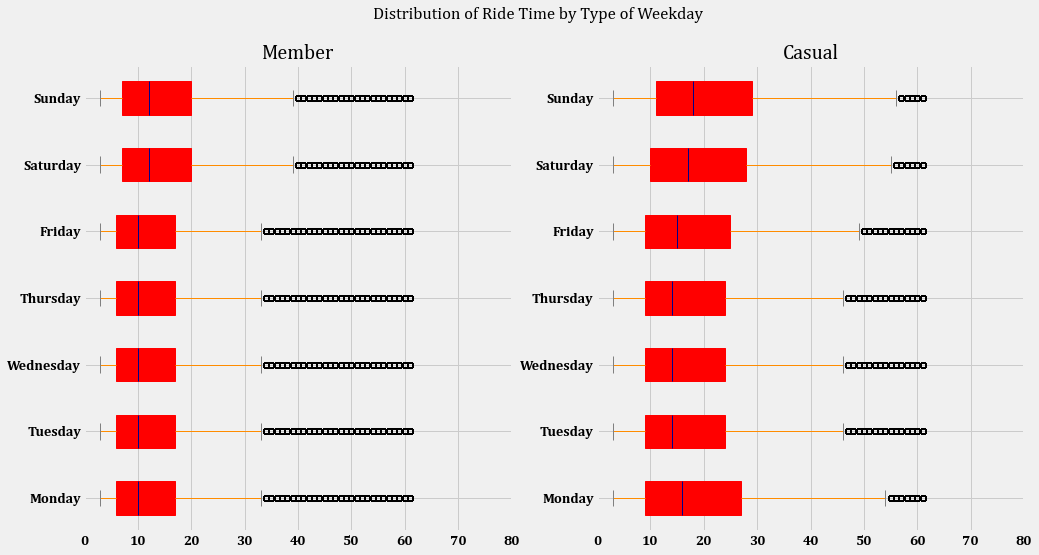

In [31]:
_ = mp.figure(figsize=(30,30))
_ = mp.style.use("fivethirtyeight")

fig, (ax1, ax2) = mp.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(15)

_ = reduced_data[reduced_data['member_casual'] == 'member'].plot(kind='box', by = 'weekday', column = 'ride_time', color=props, figsize=(10,15), ax=ax1, vert=False, patch_artist=True)
_ = ax1.set_title('Member')
_ = ax1.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = ax1.set_xticks(np.arange(0, 81, 10))

_ = reduced_data[reduced_data['member_casual'] == 'casual'].plot(kind='box', by = 'weekday', column = 'ride_time', color=props, figsize=(10,15), ax=ax2, vert=False, patch_artist=True)
_ = ax2.set_title('Casual')
_ = ax2.set_yticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = ax2.set_xticks(np.arange(0, 81, 10))

_ = mp.suptitle("Distribution of Ride Time by Type of Weekday")


There are more number of casual riders and their ride time has a bigger range as compared to the members throughout the week.

The reason for this might be that the members are using it as a routine (mostly for work commute) while the casuals are using it for multiple reasons.



#### Distribution Analysis based on the Ride Types.

Calculating the stats for different ride types for the member and casual rides.

<Figure size 2160x2160 with 0 Axes>

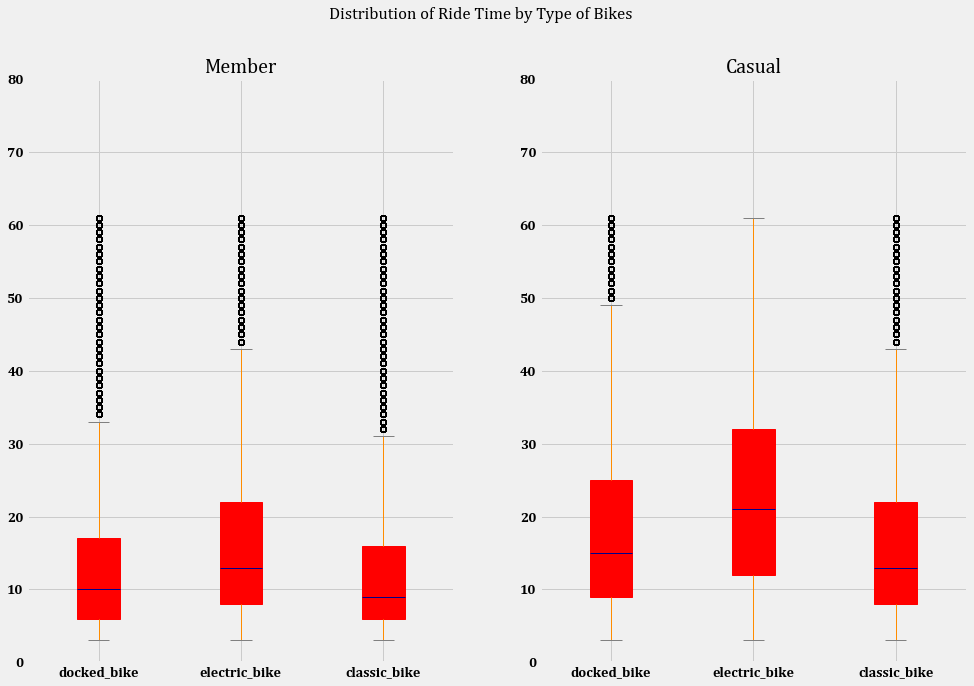

In [33]:
_ = mp.figure(figsize=(30,30))
_ = mp.style.use("fivethirtyeight")

fig, (ax1, ax2) = mp.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(15)

bike_types = list(reduced_data['rideable_type'].unique())

_ = reduced_data[reduced_data['member_casual'] == 'member'].plot(kind='box', by = 'rideable_type', column = 'ride_time', color=props, figsize=(10,15), ax=ax1, patch_artist=True)
_ = ax1.set_title('Member')
_ = ax1.set_xticklabels(bike_types)
_ = ax1.set_yticks(np.arange(0, 90, 10))

_ = reduced_data[reduced_data['member_casual'] == 'casual'].plot(kind='box', by = 'rideable_type', column = 'ride_time', color=props, figsize=(10,15), ax=ax2, patch_artist=True)
_ = ax2.set_title('Casual')
_ = ax2.set_xticklabels(bike_types)
_ = ax2.set_yticks(np.arange(0, 90, 10))

_ = mp.suptitle("Distribution of Ride Time by Type of Bikes")


Electric bikes have highest riding time as compared to docked and classic bike for both casuals and members. Even the medians are high.

The classic bikes have lowest ride times for both casuals and members.

For both the docked and electric bikes casuals have more ride time as compared to the members.

### Guiding questions
**How should you organize your data to perform analysis on it?**<br>
The data provided in all the different CSV files has been organized into a single CSV file.

**Has your data been properly formatted?**<br>
Yes, all the columns have been formatted to have appropriate data type.

**What surprises did you discover in the data?**<br>
One of the surprising observations was that the members have less riding time than casuals. But further analysis also reveals that the members use the bikes for fixed routines which means the bikes will also be used for predetermined periods of time.<br>
On the other hand the casuals use the bike for recreational purposes which means their time will also vary and be higher than members.

**What trends or relationships did you find in the data?**<br>
* Number of members are higher than casuals in the dataset.
* More rides occur in the last semester of year.
* There is more of a difference in the ridetime of members/casual from midweek to weekends.
* Members use bikes for routine activities that differs from casual.
* Casuals have higher riding time.
* Both Members and Casuals tend to prefer Electric bikes.

**How will these insights help answer your business questions?**<br>
This insights helps to build a profile for members and casuals. Which can be used to target potential casual customers and convert them into members.

<hr style="border:1px solid white">

### SHARE

The insights gathered about the data:

* Members have the biggest proportion of the dataset, 14% bigger than casuals.

* There are more data points at the last semester of 2020 and 2021.

* Temperature heavily influences the volume of rides in the month.

* The month with the biggest count of data points was 2021 July with ~8% of the dataset.

* In all months we have more members' rides than casual rides except for 2021 June, July and August.

* The difference between the members and casuals is smaller in the mid part of the years and it increases in the last part till the beggining of the new year.

* The highest number of rides is on the the weekend.

* There's a bigger volume of bikers in the afternoon. Members have the highest number of rides in the early morning. 

One of the observations is that the distribution of rides throughout the year is cyclical, as seen on chart of **Distribution by Month** and it seems to be influenced by the **Temperature**.

Another question is: **Why are there more members than casual?**<br>
One plausible answer could be that members have a necessity for the bikes unlike casuals, as can be seen on how there are more members than casuals on cold months and members' tendency to use the bike in a routine manner.

There are more bike rides on the weekends. That might be because the number of member rides increase and casuals also increase significantly which could mean that they are using the bikes for recreational purposes.

This even more plausible when knowing that there is a bigger volume of bikers in the afternoon and evening.

**Differences between Members and Casuals:-**

Members have higher number of rides, except for on saturday. On Saturday, casuals take place as having the most data points.<br>
Weekends have the higher rides by casuals, starting on **Friday, a ~11% increase**.<br>
During the **Weekend (Saturday, Sunday)** we have higher rides from casuals between **10am to 6pm**.<br>
There are more member rides in the early morning and morning, between **5am and 12pm**. And more casuals rides between **10pm and 4am**.<br>
There's a big increase of rides in the **Midweek (Monday, Tuesday, Wednesday, Thursday, Friday)** between **6am to 9am** for members. Then there is a decrease. Another big increase is from **3pm to 6pm**.<br>
Members have a bigger preference for **classic bikes**.<br>
Casuals have higher riding time than members.<br>
Members have the same riding time during the midweek, which increases during weekends.<br>
Casuals follow a more cyclical distribution, their ride time peaks on Weekends and goes to the lowest point on **Wednesday/Thursday**.<br>
One simple observation that we can make from all this information is that members have a more routine use for bikes unlike casuals.<br>
Their uses is for more routine activities, like:
* Go to work.
* Use it as an exercise.

This can be proven from the observation that we have more member rides in between 6am to 9am and at 3pm to 6pm. Also, members may have predetermined routes for using the bikes, as proven by the observation that the riding time for members doesn't change during the midweek, and increases during weekends.

The bikes is also heavily used for recreation on the weekends, when riding time increases and casuals take place.

Members also have a bigger preference for classic bikes.

**Conclusion:**

* Members use the bikes for routine activities, which includes going to work and probably exercising.
* Bikes are used for recreational activities on the weekends.
* Rides are influenced by temperature.

### Guiding questions
**Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?**<br>
Yes. The distribution analysis has revealed several key differences between members and casuals.

**What story does your data tell?**<br>
The main story the analysis tells is the behaviour of the usage of the bikes.
* The members have set routines like going to work.
* And therefore they have less riding time, because they have a set route to take.
* Casuals use the bikes for more recreational purposes.
* Therefore their ride times vary.


**How do your findings relate to your original question?**<br>
The original question was **Find the keys differences between casuals and annual riders**
* For this we built a profile for the memebrs and the casuals and understood their riding behaviours.<br>

Another question was **How digital media could influence them**
* The analysis reveals how they use the bikes and what bikes they prefer does answer the given question.


**Who is your audience? **What is the best way to communicate with them?**<br>
The main target audience is the MArketing Team of Cyclistic. The best way to communicate is through a presentation explaining the data and all the visualizations along with the insights.

**Can data visualization help you share your findings?**<br>
Yes, the main core of the finds is through data visualization.

**Is your presentation accessible to your audience?**<br>
Yes, the visualizations are made using proper colors, the labels and the values on the axis are clearly visible.

<hr style="border:1px solid white">

### ACT

This is where the marketing team comes into the picture and does their marketing campaign with the insights provided by this analysis.

### Guiding questions
**What is your final conclusion based on your analysis?**<br>
The conclusion has been elaborated in the SHARE phase.


**How could your team and business apply your insights?**<br>
The insights can be used by the marketing team to understand the needs of the casuals and prepare a marketing campaign to turn them into members.
They can focus on the Casuals that have jobs as a starting point to turn them into members.


**What next steps would you or your stakeholders take based on your findings?**<br>
Futher analysis can be done on the marketing campaign done by the team and find which casuals responded positively to it. Create a profile for them and improve the campaign.<br>
And we can do further analysis to retain the member clients.


**Is there additional data you could use to expand on your findings?**<br>
**Geographical Data** - We can use the information of rides distribution across the stations to understand which station can provide which bikes to more clients and their preferences.

**Improved Climate Data** - More weather data will allow us to do a comprehensive analysis on how the climate affects the rides, which bibkes are preffered in which climate. Which stations record more or less rides and make bikes available accordingly.

**More Info On Members** - To create a better profile to understand the behaviour of members and casuals to find out even the most subtle differences and use it for marketing.

<hr style="border:1px solid white">

## Conclusion

The Google Analytics Professional Certificate has taught me a lot about processing, analysing and presenting the insights from the data.

Though the language the course used was R but I decided to use Python.

Throughout the project I also learnt a lot about the language and the Pandas library which is really useful for analysing data.